# Airport Delays
## Unsupervised Machine Learning: Clustering

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import psycopg2 as psy
import seaborn as sns
%matplotlib inline

#### Step 2: Examine your data 

In [2]:
!ls ../assets

Airport_operations.csv    airport_cancellations.csv airports.csv


In [3]:
df_raw = pd.read_csv("assets/airports/airport_cancellations.csv")
df = df_raw.dropna() 
print df.shape
df.head()

(805, 6)


Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   
2     ABQ  2006.0                    392.0                  329.0   
3     ABQ  2007.0                    366.0                  304.0   
4     ABQ  2008.0                    333.0                  300.0   

   Departure Diversions  Arrival Diversions  
0                  71.0                46.0  
1                  61.0                33.0  
2                  71.0               124.0  
3                 107.0                45.0  
4                  79.0                42.0

In [4]:
df.dtypes

Airport                     object
Year                       float64
Departure Cancellations    float64
Arrival Cancellations      float64
Departure Diversions       float64
Arrival Diversions         float64
dtype: object

In [5]:
df.describe()

Year  Departure Cancellations  Arrival Cancellations  \
count   805.000000               805.000000             805.000000   
mean   2008.986335              1292.038509            1333.124224   
std       3.158116              1835.961943            1975.224868   
min    2004.000000                 0.000000               0.000000   
25%    2006.000000               349.000000             314.000000   
50%    2009.000000               663.000000             642.000000   
75%    2012.000000              1472.000000            1523.000000   
max    2014.000000             16618.000000           17571.000000   

       Departure Diversions  Arrival Diversions  
count            805.000000          805.000000  
mean             173.315528          169.413665  
std              172.345539          228.521615  
min                0.000000            0.000000  
25%               62.000000           41.000000  
50%              110.000000           84.000000  
75%              236.000000          190.000000  
max             1064.000000         1948.000000

In [6]:
df["Airport"].describe()

count     805
unique     74
top       LAS
freq       11
Name: Airport, dtype: object

In [7]:
le = LabelEncoder()
df["Airport_code"] = le.fit_transform(df["Airport"])

In [8]:
df.head(2)

Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   

   Departure Diversions  Arrival Diversions  Airport_code  
0                  71.0                46.0             0  
1                  61.0                33.0             0

In [9]:
for i in df.columns.tolist()[2:-1]:    
    print df.groupby("Airport").mean().sort_values(i, ascending=False)[i][:5], "\n"

Airport
ORD    10892.000000
ATL     6562.363636
DFW     6045.727273
LGA     4605.727273
EWR     4241.909091
Name: Departure Cancellations, dtype: float64 

Airport
ORD    11730.454545
ATL     7317.272727
DFW     6429.909091
LGA     4559.727273
EWR     4355.090909
Name: Arrival Cancellations, dtype: float64 

Airport
ATL    884.454545
ORD    735.000000
DFW    654.727273
IAH    495.636364
DEN    462.272727
Name: Departure Diversions, dtype: float64 

Airport
DFW    1221.818182
ATL     872.181818
IAH     778.363636
ORD     769.090909
LGA     517.363636
Name: Arrival Diversions, dtype: float64 



In [10]:
df_op = pd.read_csv("assets/airports/Airport_operations.csv")
df_op.dropna(how='any', inplace=True)

In [11]:
print df_op.shape
df_op.head(2)

(841, 15)


airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                            0.803   
1                            51877                            0.814   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   

   average taxi out delay  average airport departure delay  \
0                    2.43                             12.1   
1                    2.29                             11.2   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   

   average gate arrival delay  
0                       10.87  
1                       10.24

In [12]:
df_op.describe()

year  departures for metric computation  \
count   841.000000                         841.000000   
mean   2009.028537                      108257.063020   
std       3.156497                       98278.401526   
min    2004.000000                         261.000000   
25%    2006.000000                       37653.000000   
50%    2009.000000                       72043.000000   
75%    2012.000000                      162913.000000   
max    2014.000000                      491826.000000   

       arrivals for metric computation  percent on-time gate departures  \
count                       841.000000                       841.000000   
mean                     107815.561237                         0.764119   
std                       97916.908601                         0.093361   
min                         259.000000                         0.246700   
25%                       37502.000000                         0.745700   
50%                       71254.000000                         0.782500   
75%                      160775.000000                         0.809800   
max                      486799.000000                         0.909700   

       percent on-time airport departures  percent on-time gate arrivals  \
count                          841.000000                     841.000000   
mean                             0.714283                       0.754281   
std                              0.101271                       0.082302   
min                              0.245700                       0.324100   
25%                              0.684800                       0.737500   
50%                              0.737200                       0.768300   
75%                              0.772200                       0.796500   
max                              0.897400                       0.880300   

       average_gate_departure_delay  average_taxi_out_time  \
count                    841.000000             841.000000   
mean                      13.561403              13.703389   
std                        4.746563               3.792181   
min                        5.350000               7.040000   
25%                       10.910000              11.260000   
50%                       12.640000              12.810000   
75%                       14.950000              15.650000   
max                       40.800000              35.760000   

       average taxi out delay  average airport departure delay  \
count              841.000000                       841.000000   
mean                 3.519750                        16.249964   
std                  2.391278                         5.353012   
min                  0.000000                         6.290000   
25%                  2.210000                        12.950000   
50%                  2.990000                        15.220000   
75%                  4.080000                        17.940000   
max                 18.940000                        40.870000   

       average airborne delay  average taxi in delay  average block delay  \
count              841.000000             841.000000           841.000000   
mean                 2.921237               1.348894             3.330773   
std                  1.201453               0.882252             1.026872   
min                  0.950000               0.000000             1.230000   
25%                  2.050000               0.800000             2.630000   
50%                  2.650000               1.080000             3.160000   
75%                  3.620000               1.740000             3.860000   
max                  7.820000               6.180000             7.520000   

       average gate arrival delay  
count                  841.000000  
mean                    14.013222  
std                      4.482215  
min                      6.330000  
25%                     11.300000  
50%                     13.080000  
75%                     15.250000  
max

### Intro: Write a problem statement / aim for this project

### __Problem Statement__

We seek to understand the behaviour of flight delays in airports regulated by the FAA. The aim is to understand the distribution, characteristics, and components of individual airports operations that are leading to these delays, and to generate a report detailing the findings, with recommendations as to which airports and operational characteristics they should target to decrease delays.

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [13]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://Matt:@localhost:5432/')

Load our csv files into tables

In [14]:
pd.read_csv("assets/airports/airport_cancellations.csv").to_sql("cancellations", engine, if_exists='replace')
pd.read_csv("assets/airports/Airport_operations.csv").to_sql("operations", engine, if_exists='replace')
pd.read_csv("assets/airports/airports.csv").to_sql("airports", engine, if_exists='replace')

Join airport_cancellations.csv and airports.csv into one table

In [15]:
%load_ext sql

In [16]:
%sql postgresql://Matt:@localhost:5432/

u'Connected: Matt@'

In [17]:
%%sql
SELECT COUNT(*) FROM "cancellations";

1 rows affected.


[(805L,)]

In [18]:
%%sql
SELECT * FROM "cancellations" LIMIT 2;

2 rows affected.


[(0L, u'ABQ', 2004.0, 242.0, 235.0, 71.0, 46.0),
 (1L, u'ABQ', 2005.0, 221.0, 190.0, 61.0, 33.0)]

In [19]:
%%sql
SELECT COUNT(*) FROM "airports";

1 rows affected.


[(5167L,)]

In [20]:
%%sql
SELECT * FROM "airports" LIMIT 2;

2 rows affected.


[(0L, 3443.0, u'STX', u'HENRY E ROHLSEN', u"Henry E Rohlsen Int'l Airport", u'Airport', u'ASO', u'-VIRGIN ISLANDS-', u'CHRISTIANSTED', u'VI', u'Public Use', 17.701556, -64.801722, u'Yes'),
 (1L, 5088.0, u'X64', u'PATILLAS', None, u'Airport', u'ASO', u'#NAME?', u'PATILLAS', u'PR', u'Public Use', 17.982189, -66.01933, u'No')]

In [21]:
df_ = pd.read_sql('SELECT * FROM "cancellations" c INNER JOIN "airports" a ON a."LocID" = c."Airport" LIMIT 1;', con=engine)
[str(i) for i in df_.columns.tolist()]

['index',
 'Airport',
 'Year',
 'Departure Cancellations',
 'Arrival Cancellations',
 'Departure Diversions',
 'Arrival Diversions',
 'index',
 'Key',
 'LocID',
 'AP_NAME',
 'ALIAS',
 'Facility Type',
 'FAA REGION',
 'COUNTY',
 'CITY',
 'STATE',
 'AP Type',
 'Latitude',
 'Longitude',
 'Boundary Data Available']

In [22]:
%%sql
SELECT
"Airport",
"Year",
"Departure Cancellations",
"Arrival Cancellations",
"Departure Diversions",
"Arrival Diversions",
"AP_NAME",
"ALIAS",
"Facility Type",
"FAA REGION",
"COUNTY",
"CITY",
"STATE",
"AP Type",
"Latitude",
"Longitude",
"Boundary Data Available"
INTO "joined"
FROM "cancellations" c
INNER JOIN "airports" a
ON a."LocID" = c."Airport";

(psycopg2.ProgrammingError) relation "joined" already exists
 [SQL: 'SELECT\n"Airport",\n"Year",\n"Departure Cancellations",\n"Arrival Cancellations",\n"Departure Diversions",\n"Arrival Diversions",\n"AP_NAME",\n"ALIAS",\n"Facility Type",\n"FAA REGION",\n"COUNTY",\n"CITY",\n"STATE",\n"AP Type",\n"Latitude",\n"Longitude",\n"Boundary Data Available"\nINTO "joined"\nFROM "cancellations" c\nINNER JOIN "airports" a\nON a."LocID" = c."Airport";']


In [23]:
%%sql
SELECT * FROM operations LIMIT 0;

0 rows affected.


[]

In [24]:
names = _.field_names

In [25]:
for i in names:
    print "o."+'\"'+i+'\"'+","

o."index",
o."airport",
o."year",
o."departures for metric computation",
o."arrivals for metric computation",
o."percent on-time gate departures",
o."percent on-time airport departures",
o."percent on-time gate arrivals",
o."average_gate_departure_delay",
o."average_taxi_out_time",
o."average taxi out delay",
o."average airport departure delay",
o."average airborne delay",
o."average taxi in delay",
o."average block delay",
o."average gate arrival delay",


In [26]:
%%sql
SELECT
j."Airport",
j."Year",
j."Departure Cancellations",
j."Arrival Cancellations",
j."Departure Diversions",
j."Arrival Diversions",
j."AP_NAME",
j."ALIAS",
j."Facility Type",
j."FAA REGION",
j."COUNTY",
j."CITY",
j."STATE",
j."AP Type",
j."Latitude",
j."Longitude",
j."Boundary Data Available",
o."departures for metric computation",
o."arrivals for metric computation",
o."percent on-time gate departures",
o."percent on-time airport departures",
o."percent on-time gate arrivals",
o."average_gate_departure_delay",
o."average_taxi_out_time",
o."average taxi out delay",
o."average airport departure delay",
o."average airborne delay",
o."average taxi in delay",
o."average block delay",
o."average gate arrival delay"
INTO "joined2"
FROM "joined" j
INNER JOIN "operations" o
ON j."Airport" = o."airport" AND j."Year" = o."year";

(psycopg2.ProgrammingError) relation "joined2" already exists
 [SQL: 'SELECT\nj."Airport",\nj."Year",\nj."Departure Cancellations",\nj."Arrival Cancellations",\nj."Departure Diversions",\nj."Arrival Diversions",\nj."AP_NAME",\nj."ALIAS",\nj."Facility Type",\nj."FAA REGION",\nj."COUNTY",\nj."CITY",\nj."STATE",\nj."AP Type",\nj."Latitude",\nj."Longitude",\nj."Boundary Data Available",\no."departures for metric computation",\no."arrivals for metric computation",\no."percent on-time gate departures",\no."percent on-time airport departures",\no."percent on-time gate arrivals",\no."average_gate_departure_delay",\no."average_taxi_out_time",\no."average taxi out delay",\no."average airport departure delay",\no."average airborne delay",\no."average taxi in delay",\no."average block delay",\no."average gate arrival delay"\nINTO "joined2"\nFROM "joined" j\nINNER JOIN "operations" o\nON j."Airport" = o."airport" AND j."Year" = o."year";']


Query the database for our initial data

In [27]:
%%sql
SELECT COUNT(*) FROM "joined2";

1 rows affected.


[(799L,)]

In [28]:
%%sql
SELECT * FROM "joined2" LIMIT 5;

5 rows affected.


[(u'ABQ', 2004.0, 242.0, 235.0, 71.0, 46.0, u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes', 53971L, 53818L, 0.803, 0.7809, 0.7921, 10.38, 9.89, 2.43, 12.1, 2.46, 0.83, 2.55, 10.87),
 (u'ABQ', 2005.0, 221.0, 190.0, 61.0, 33.0, u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes', 51829L, 51877L, 0.814, 0.7922, 0.8001, 9.6, 9.79, 2.29, 11.2, 2.26, 0.89, 2.34, 10.24),
 (u'ABQ', 2006.0, 392.0, 329.0, 71.0, 124.0, u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes', 49682L, 51199L, 0.7983, 0.7756, 0.7746, 10.84, 9.89, 2.16, 12.33, 2.12, 0.84, 2.66, 11.82),
 (u'ABQ', 2007.0, 366.0, 304.0, 107.0, 45.0, u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes', 53255L, 53611L, 0.8005, 0.7704, 0.7647, 11.29, 10.34, 2.4, 12.95, 2.19, 1.29, 3.06, 12.71),
 (u'ABQ', 2008.0, 333.0, 300.0, 79.0, 42.0, u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes', 49589L, 49512L, 0.8103, 0.7844, 0.7875, 10.79, 10.41, 2.41, 12.32, 1.82, 1.03, 2.79, 11.48)]

#### 1.2 What are the risks and assumptions of our data? 

The data provided are yearly averaged figures. If seasonal effects are non-negligible, the risk of performing analysis on this dataset is that those effects will be missing in the findings because the given data is not fined grained enough in the time dimension. Out of necessity, this analysis thus assumes seasonality effects are not a key element of delays.

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [29]:
dataset = pd.read_sql("SELECT * FROM joined2", con=engine)

In [30]:
print dataset.shape
dataset.head(2)

(799, 30)


Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   

   Departure Diversions  Arrival Diversions                   AP_NAME  \
0                  71.0                46.0  ALBUQUERQUE INTL SUNPORT   
1                  61.0                33.0  ALBUQUERQUE INTL SUNPORT   

                       ALIAS Facility Type FAA REGION  \
0  Albuquerque Int'l Sunport       Airport        ASW   
1  Albuquerque Int'l Sunport       Airport        ASW   

              ...             percent on-time airport departures  \
0             ...                                         0.7809   
1             ...                                         0.7922   

  percent on-time gate arrivals average_gate_departure_delay  \
0                        0.7921                        10.38   
1                        0.8001                         9.60   

  average_taxi_out_time  average taxi out delay  \
0                  9.89                    2.43   
1                  9.79                    2.29   

   average airport departure delay average airborne delay  \
0                             12.1                   2.46   
1                             11.2                   2.26   

   average taxi in delay  average block delay  average gate arrival delay  
0                   0.83                 2.55                       10.87  
1                   0.89                 2.34                       10.24  

[2 rows x 30 columns]

In [31]:
dataset.dtypes

Airport                                object
Year                                  float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
AP_NAME                                object
ALIAS                                  object
Facility Type                          object
FAA REGION                             object
COUNTY                                 object
CITY                                   object
STATE                                  object
AP Type                                object
Latitude                              float64
Longitude                             float64
Boundary Data Available                object
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals     

In [32]:
del dataset["ALIAS"]
del dataset["Facility Type"]
del dataset["Boundary Data Available"]

In [33]:
dataset.head(2)

Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   

   Departure Diversions  Arrival Diversions                   AP_NAME  \
0                  71.0                46.0  ALBUQUERQUE INTL SUNPORT   
1                  61.0                33.0  ALBUQUERQUE INTL SUNPORT   

  FAA REGION      COUNTY         CITY             ...              \
0        ASW  BERNALILLO  ALBUQUERQUE             ...               
1        ASW  BERNALILLO  ALBUQUERQUE             ...               

  percent on-time airport departures percent on-time gate arrivals  \
0                             0.7809                        0.7921   
1                             0.7922                        0.8001   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   

   average taxi out delay  average airport departure delay  \
0                    2.43                             12.1   
1                    2.29                             11.2   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   

   average gate arrival delay  
0                       10.87  
1                       10.24  

[2 rows x 27 columns]

#### Are there any unique values? 

In [34]:
for i in dataset.columns:
    print dataset[i].unique()[:3], "\n", len(dataset[i].unique())

[u'ABQ' u'ANC' u'ATL'] 
74
[ 2004.  2005.  2006.] 
11
[ 242.  221.  392.] 
672
[ 235.  190.  329.] 
655
[  71.   61.  107.] 
353
[  46.   33.  124.] 
340
[u'ALBUQUERQUE INTL SUNPORT' u'TED STEVENS ANCHORAGE INTL'
 u'HARTSFIELD - JACKSON ATLANTA INTL'] 
74
[u'ASW' u'AAL' u'ASO'] 
9
[u'BERNALILLO' u'ANCHORAGE' u'FULTON'] 
63
[u'ALBUQUERQUE' u'ANCHORAGE' u'ATLANTA'] 
69
[u'NM' u'AK' u'GA'] 
36
[u'Federalized/Commercial' u'Public Use'] 
2
[ 35.040194  61.174083  33.6367  ] 
74
[-106.609194 -149.998194  -84.427864] 
74
[53971 51829 49682] 
795
[53818 51877 51199] 
799
[ 0.803   0.814   0.7983] 
620
[ 0.7809  0.7922  0.7756] 
686
[ 0.7921  0.8001  0.7746] 
630
[ 10.38   9.6   10.84] 
561
[  9.89   9.79  10.34] 
568
[ 2.43  2.29  2.16] 
419
[ 12.1   11.2   12.33] 
599
[ 2.46  2.26  2.12] 
348
[ 0.83  0.89  0.84] 
270
[ 2.55  2.34  2.66] 
326
[ 10.87  10.24  11.82] 
554


### Part 3: Data Mining

#### 3.1 Create Dummy Variables

In [35]:
for i in ["FAA REGION", "STATE", "AP Type"]:
    df_ = pd.get_dummies(dataset[i], prefix = i, drop_first=True)
    dataset = pd.concat([dataset,df_], axis=1)

In [36]:
pd.set_option('max.columns', len(dataset.columns))
dataset.head(2)

Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   

   Departure Diversions  Arrival Diversions                   AP_NAME  \
0                  71.0                46.0  ALBUQUERQUE INTL SUNPORT   
1                  61.0                33.0  ALBUQUERQUE INTL SUNPORT   

  FAA REGION      COUNTY         CITY STATE                 AP Type  \
0        ASW  BERNALILLO  ALBUQUERQUE    NM  Federalized/Commercial   
1        ASW  BERNALILLO  ALBUQUERQUE    NM  Federalized/Commercial   

    Latitude   Longitude  departures for metric computation  \
0  35.040194 -106.609194                              53971   
1  35.040194 -106.609194                              51829   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                            0.803   
1                            51877                            0.814   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   

   average taxi out delay  average airport departure delay  \
0                    2.43                             12.1   
1                    2.29                             11.2   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   

   average gate arrival delay  FAA REGION_ACE  FAA REGION_AEA  FAA REGION_AGL  \
0                       10.87               0               0               0   
1                       10.24               0               0               0   

   FAA REGION_ANE  FAA REGION_ANM  FAA REGION_ASO  FAA REGION_ASW  \
0               0               0               0               1   
1               0               0               0               1   

   FAA REGION_AWP  STATE_AL  STATE_AZ  STATE_CA  STATE_CO  STATE_CT  STATE_DC  \
0               0         0         0         0         0         0         0   
1               0         0         0         0         0         0         0   

   STATE_FL  STATE_GA  STATE_HI  STATE_IL  STATE_IN  STATE_KY  STATE_LA  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   

   STATE_MA  STATE_MD  STATE_MI  STATE_MN  STATE_MO  STATE_NC  STATE_NE  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   

   STATE_NH  STATE_NJ  STATE_NM  STATE_NV  STATE_NY  STATE_OH  STATE_OR  \
0         0         0         1         0         0         0         0   
1         0         0         1         0         0         0         0   

   STATE_PA  STATE_PR  STATE_RI  STATE_TN  STATE_TX  STATE_UT  STATE_WA  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   

   STATE_WI  AP Type_Public Use  
0         0                   0  
1         0                   0

In [37]:
dataset.shape

(799, 71)

#### 3.2 Format and Clean the Data

Cleaning done throughout the workflow.

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

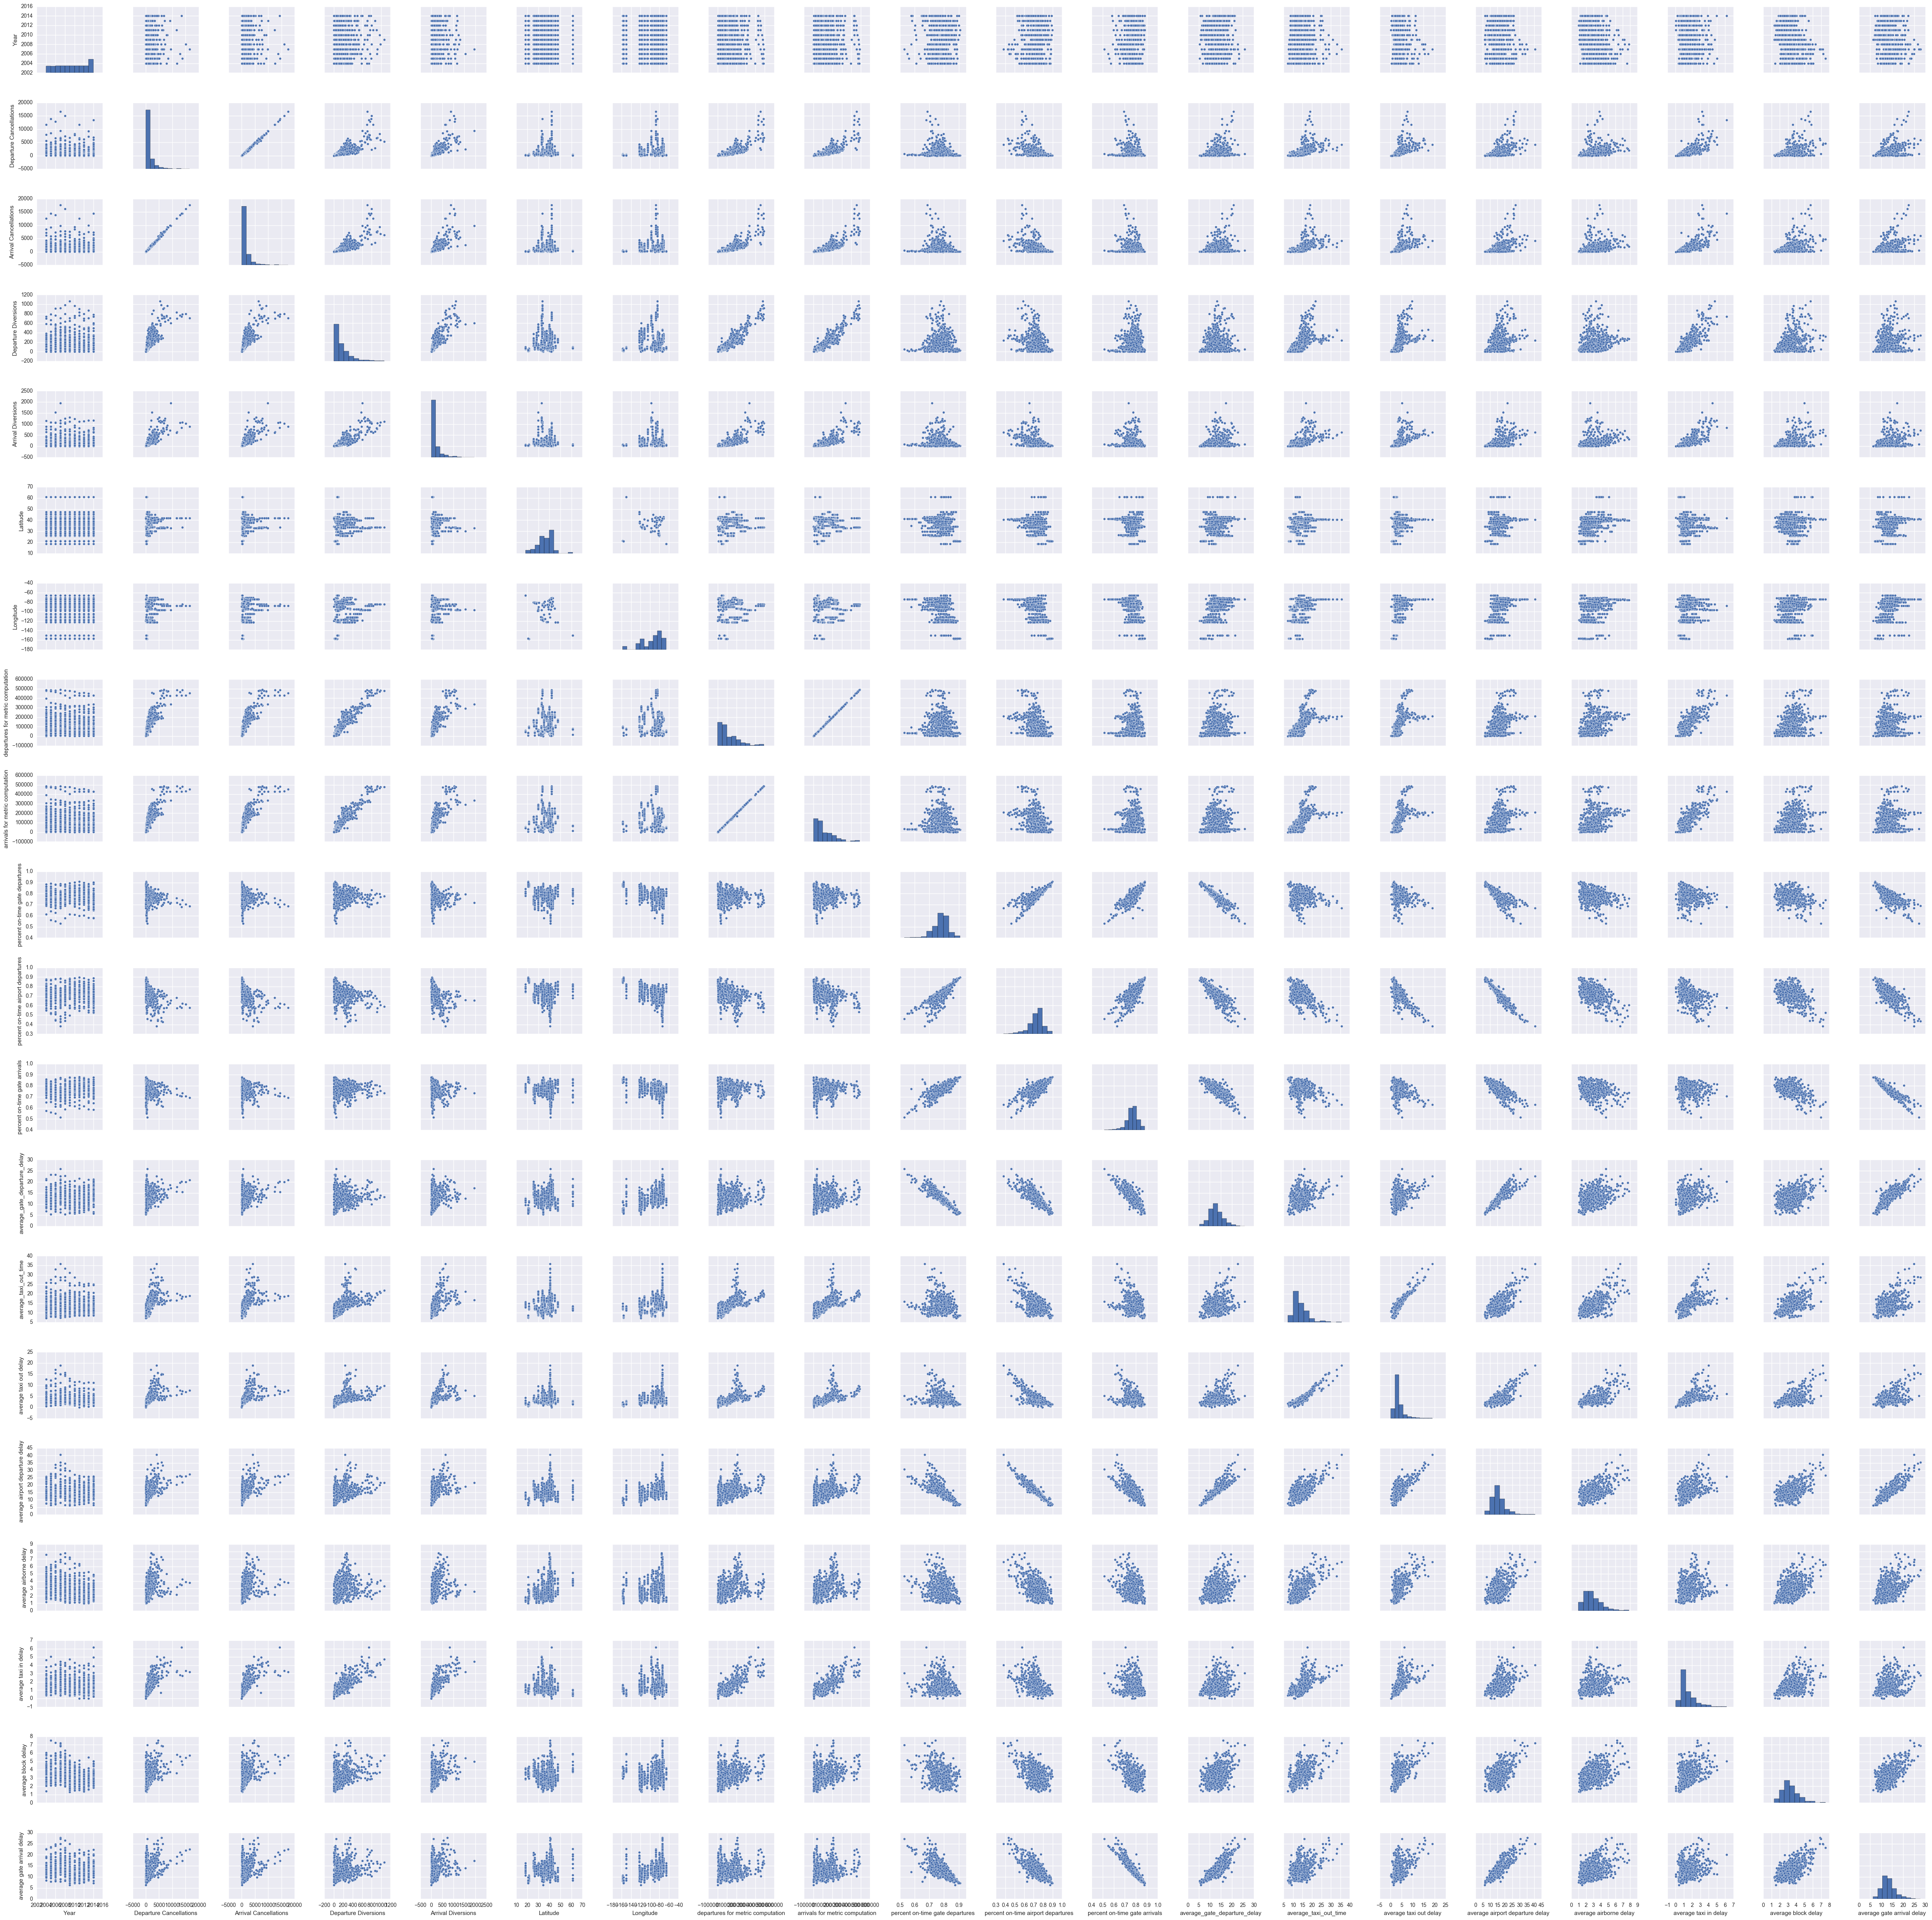

In [38]:
sns.pairplot(dataset.ix[:,:"average gate arrival delay"])

By visual inspection along the diagonal in the pairplot, the features plotted below are of approximately normal distribution, with varying degrees of skewness. Delays are all positively skewed because they are bounded to the left by zero, and percent on-time measures are all negatively skewed because they are bounded to the right by 100%.

In [39]:
normalish = ['percent on-time gate departures',
             'percent on-time airport departures',
             'percent on-time gate arrivals',
             'average_gate_departure_delay',
             'average_taxi_out_time',
             'average airport departure delay',
             'average airborne delay',
             'average taxi in delay',
             'average block delay',
             'average gate arrival delay']

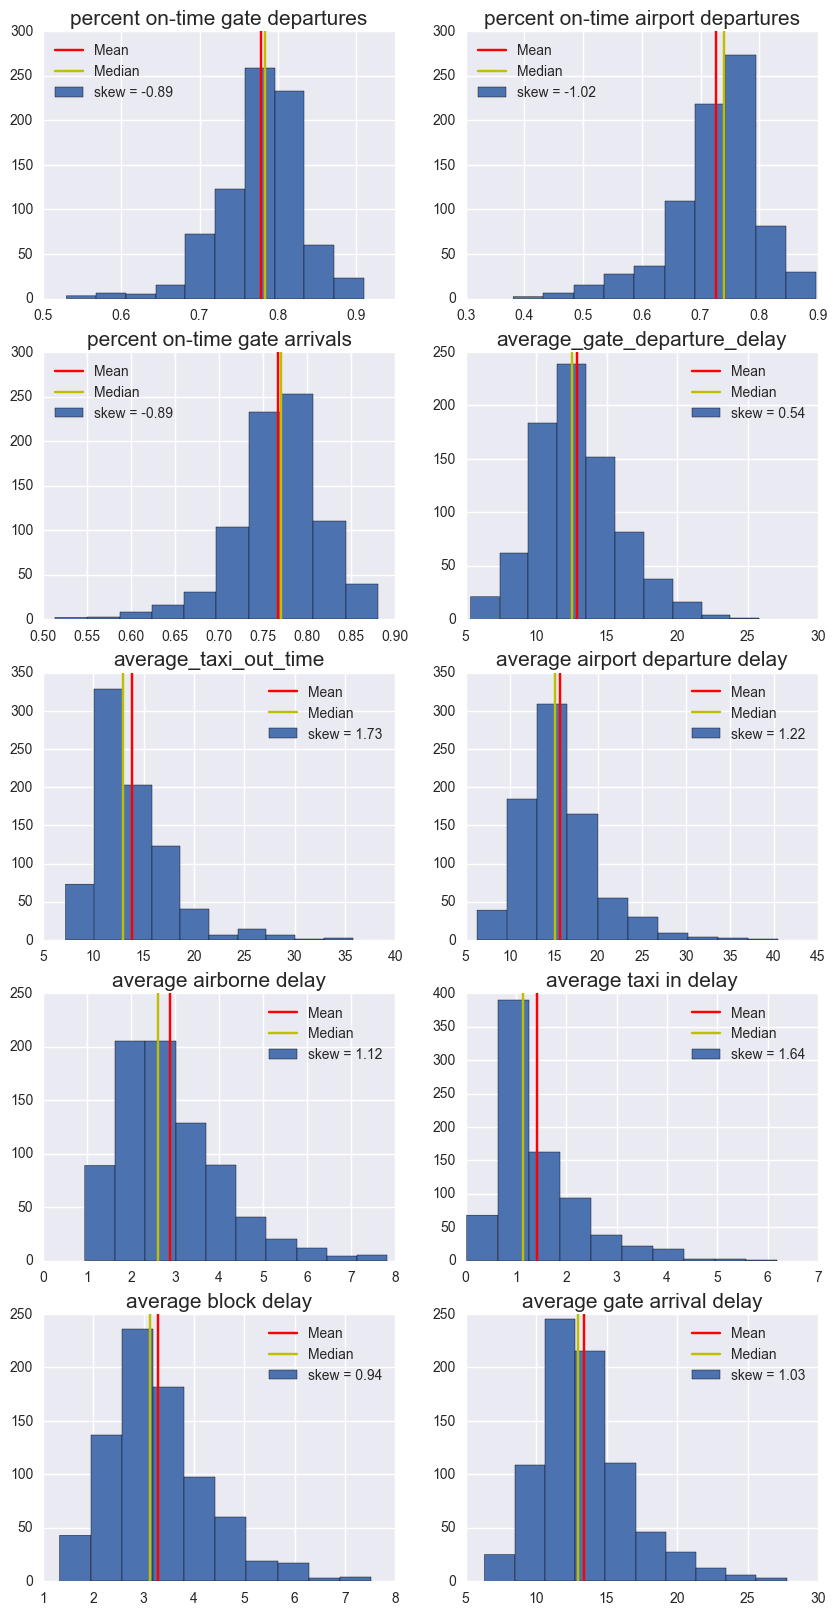

In [40]:
fig = plt.figure(figsize=(10,20))

ax1 = fig.add_subplot(521)
ax2 = fig.add_subplot(521)
ax3 = fig.add_subplot(521)
ax4 = fig.add_subplot(521)
ax5 = fig.add_subplot(521)
ax6 = fig.add_subplot(521)
ax7 = fig.add_subplot(521)
ax8 = fig.add_subplot(521)
ax9 = fig.add_subplot(521)
ax10 = fig.add_subplot(521)

for n,ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]):
    ax = fig.add_subplot(5,2,n+1)
    ax.hist(dataset[normalish[n]])
    ax.axvline(dataset[normalish[n]].mean(), c='r')
    ax.axvline(dataset[normalish[n]].median(), c='y')
    ax.set_title(normalish[n], fontsize=15)
    ax.legend(["Mean","Median", "skew = "+str(round(dataset[normalish[n]].skew(),2))], loc='best')

plt.show()

#### 4.2 Find correlations in the data

First we look at the performance of airports globally, i.e. without segmentation into individual FAA regions, states, counties, airports etc.

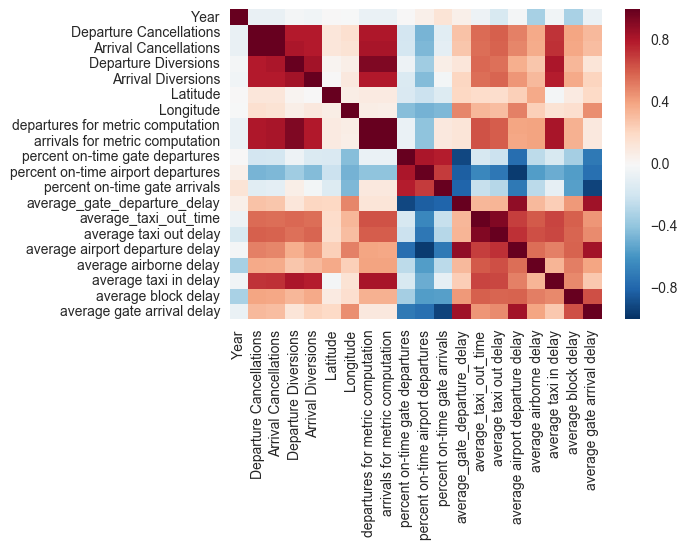

In [41]:
sns.heatmap(dataset.ix[:,:"average gate arrival delay"].corr())

__Year__ does not exhibit strong correlations with any other features, which indicates that, _globally speaking_, there aren't strong trends in airport operational performance over time. It does exhibit very slight positive correlation with on-time departures and arrivals, which shows that, again globally speaking, airports have improved slightly in that respect.

__Percentage on-time__ measures are negatively correlated with all measures of cancellations, diversions and delays, which is to be expected from their inverse relationships.

Interestingly, while all delay measures exhibit positive correlation with departure and arrival cancellations and diversions, __average taxi in delay__ exhibited the strongest positive correlation.

In [42]:
dataset.ix[:,:"average gate arrival delay"].corr()

Year  Departure Cancellations  \
Year                                1.000000                -0.074954   
Departure Cancellations            -0.074954                 1.000000   
Arrival Cancellations              -0.071526                 0.997464   
Departure Diversions               -0.021804                 0.796385   
Arrival Diversions                 -0.035331                 0.792253   
Latitude                            0.002632                 0.122349   
Longitude                          -0.004275                 0.159456   
departures for metric computation  -0.068488                 0.808959   
arrivals for metric computation    -0.067507                 0.809994   
percent on-time gate departures     0.002818                -0.183962   
percent on-time airport departures  0.056174                -0.466213   
percent on-time gate arrivals       0.135191                -0.113363   
average_gate_departure_delay        0.061650                 0.291753   
average_taxi_out_time              -0.052435                 0.566103   
average taxi out delay             -0.160599                 0.599671   
average airport departure delay    -0.023332                 0.504939   
average airborne delay             -0.334442                 0.376828   
average taxi in delay              -0.031265                 0.723515   
average block delay                -0.321256                 0.396928   
average gate arrival delay         -0.064928                 0.325605   

                                    Arrival Cancellations  \
Year                                            -0.071526   
Departure Cancellations                          0.997464   
Arrival Cancellations                            1.000000   
Departure Diversions                             0.814378   
Arrival Diversions                               0.793773   
Latitude                                         0.122006   
Longitude                                        0.145081   
departures for metric computation                0.823676   
arrivals for metric computation                  0.824622   
percent on-time gate departures                 -0.172420   
percent on-time airport departures              -0.453081   
percent on-time gate arrivals                   -0.094130   
average_gate_departure_delay                     0.275300   
average_taxi_out_time                            0.559625   
average taxi out delay                           0.588159   
average airport departure delay                  0.487547   
average airborne delay                           0.367273   
average taxi in delay                            0.730266   
average block delay                              0.388365   
average gate arrival delay                       0.305527   

                                    Departure Diversions  Arrival Diversions  \
Year                                           -0.021804           -0.035331   
Departure Cancellations                         0.796385            0.792253   
Arrival Cancellations                           0.814378            0.793773   
Departure Diversions                            1.000000            0.840401   
Arrival Diversions                              0.840401            1.000000   
Latitude                                        0.028404            0.005257   
Longitude                                       0.065182            0.105129   
departures for metric computation               0.934147            0.798750   
arrivals for metric computation                 0.934035            0.799456   
percent on-time gate departures                -0.051995           -0.142091   
percent on-time airport departures             -0.357375           -0.431068   
percent on-time gate arrivals                   0.067575           -0.028064   
average_gate_departure_delay                    0.124451            0.218199   
average_taxi_out_time                           0.571622            0.558053   
average taxi out delay  

Now, having reached made some observations about the factors that generally affect airport performance, we look deeper into how individual FAA regions have performed:

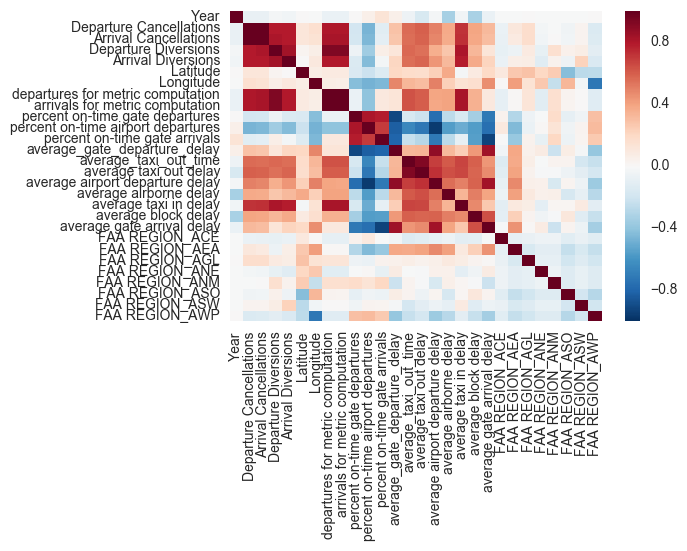

In [43]:
sns.heatmap(dataset.ix[:,:'FAA REGION_AWP'].corr())

__FAA Region AEA__ is clearly positively correlated to average delays and negatively correlated to percentage on-time measures, and is thus overall __most poorly performing__ compared to other regions.

On the other hand, the reverse is true for __FAA regions AWP and ANM__ which shows that they are __better performing__.

The following airports are in the poorly performing FAA Region AEA:

In [44]:
dataset[dataset["FAA REGION"]=="AEA"].groupby(["AP_NAME","Latitude","Longitude"]).count().iloc[:,:0]

Empty DataFrame
Columns: []
Index: [(BALTIMORE/WASHINGTON INTL THURGOOD MARSHAL, 39.175361, -76.668333), (BUFFALO NIAGARA INTL, 42.940417, -78.730583), (JOHN F KENNEDY INTL, 40.639751, -73.778926), (LA GUARDIA, 40.77725, -73.872611), (LONG ISLAND MAC ARTHUR, 40.79525, -73.100222), (NEWARK LIBERTY INTL, 40.6925, -74.168667), (PHILADELPHIA INTL, 39.872249, -75.240866), (PITTSBURGH INTL, 40.491472, -80.232861), (RONALD REAGAN WASHINGTON NATIONAL, 38.851916, -77.037699), (STEWART INTL, 41.504111, -74.104833), (WASHINGTON DULLES INTL, 38.947444, -77.459944), (WESTCHESTER COUNTY, 41.066944, -73.707556)]

#### 4.3 What is the value of understanding correlations before PCA? 

After PCA transformation, the resulting covariance matrix is diagonalised and there are no correlations between the principal components. So, in order to discover the correlations between features, it must be done before PCA.

#### 4.4 Validate your findings using statistical analysis

Dispersed throughout the notebook.

#### 4.5 How can you improve your overall analysis? 

In addition to PCA, unsupervised machine learning techniques for clustering can be used to further discover any hidden structures to the data, such as:

- Clustering: KMeans, Hierarchical, DBSCAN
- Clustering by Airport, State, FAA Region



__Supervised__

- Linear regression
- Logistic regression
- Ensemble methods: Decision Trees, Random Forests, Bagging, Boosting


### Part 5: Perform a PCA and Present Findings

#### 5.1 Conduct the PCA

In [45]:
from sklearn.decomposition import PCA

In [46]:
diffy = dataset.copy()
del diffy["AP_NAME"]
del diffy["Airport"]
del diffy["FAA REGION"]
del diffy["COUNTY"]
del diffy["CITY"]
del diffy["STATE"]
del diffy["AP Type"]

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
diffy_ = ss.fit_transform(diffy.ix[:,"percent on-time gate departures":])

PCA is performed on the following features:

In [48]:
diffy.ix[:,"percent on-time gate departures":].columns

Index([u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'FAA REGION_ACE', u'FAA REGION_AEA', u'FAA REGION_AGL',
       u'FAA REGION_ANE', u'FAA REGION_ANM', u'FAA REGION_ASO',
       u'FAA REGION_ASW', u'FAA REGION_AWP', u'STATE_AL', u'STATE_AZ',
       u'STATE_CA', u'STATE_CO', u'STATE_CT', u'STATE_DC', u'STATE_FL',
       u'STATE_GA', u'STATE_HI', u'STATE_IL', u'STATE_IN', u'STATE_KY',
       u'STATE_LA', u'STATE_MA', u'STATE_MD', u'STATE_MI', u'STATE_MN',
       u'STATE_MO', u'STATE_NC', u'STATE_NE', u'STATE_NH', u'STATE_NJ',
       u'STATE_NM', u'STATE_NV', u'STATE_NY', u'STATE_OH', u'STATE_OR',
       u'STATE_PA', u'STATE_PR', u'STATE_RI', u'STATE_TN', u

In [49]:
explained = []
for i in range(1,41,1):
    pca = PCA(n_components=i)
    pca.fit(diffy_)
    explained.append(np.cumsum(pca.explained_variance_ratio_)[-1])

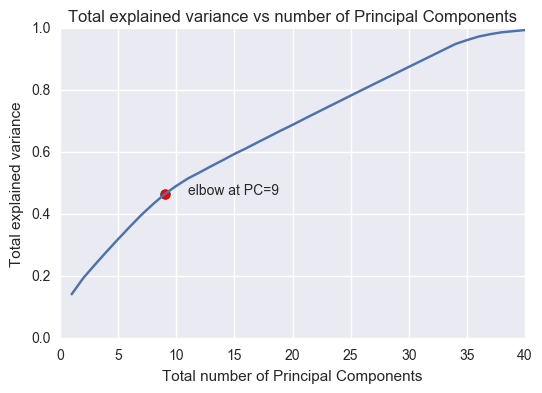

In [50]:
x_range = range(1,41,1)
plt.plot(x_range, explained)
plt.title("Total explained variance vs number of Principal Components")
plt.xlabel("Total number of Principal Components")
plt.ylabel("Total explained variance")
plt.scatter(9, explained[8], c='r', marker='o', s=50)
plt.text(11, explained[8], "elbow at PC=9")
plt.xlim(0,40)
plt.ylim(0,1)
plt.show()

In [51]:
pca = PCA(n_components=9)
pca.fit(diffy_)
pca.explained_variance_ratio_

array([ 0.14225895,  0.05221491,  0.04309841,  0.04178193,  0.04073557,
        0.03962069,  0.03863526,  0.03458649,  0.03228635])

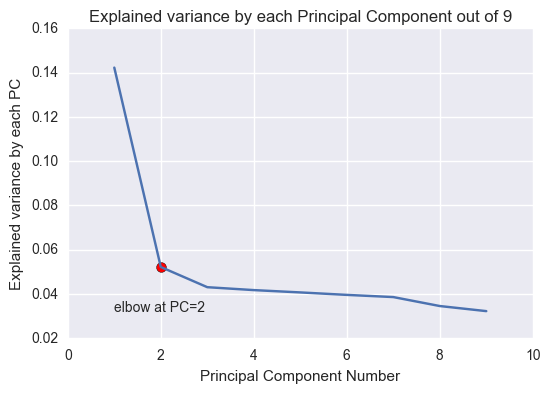

In [52]:
x_range = range(1,10,1)
plt.plot(x_range, pca.explained_variance_ratio_)
plt.title("Explained variance by each Principal Component out of 9")
plt.xlabel("Principal Component Number")
plt.ylabel("Explained variance by each PC")
plt.scatter(2, pca.explained_variance_ratio_[1], c='r', marker='o', s=50)
plt.text(1, pca.explained_variance_ratio_[1]-0.02, "elbow at PC=2")
plt.show()

Here we examine how each feature contributed to the first principal component out of a total of 9.

In [57]:
pc1 = pd.DataFrame(pca.components_[0]).transpose()
pc1.columns = diffy.ix[:,"percent on-time gate departures":].columns
pc1.index = ["feature contribution"]
pc1.transpose().sort_values("feature contribution", ascending = False).iloc[:,:]

feature contribution
average airport departure delay                 0.346128
average gate arrival delay                      0.311793
average_gate_departure_delay                    0.301052
average taxi out delay                          0.263663
average_taxi_out_time                           0.253921
average block delay                             0.246835
average airborne delay                          0.222993
FAA REGION_AEA                                  0.202145
average taxi in delay                           0.180163
STATE_NY                                        0.161918
STATE_NJ                                        0.124399
STATE_PA                                        0.059507
STATE_IL                                        0.047052
STATE_GA                                        0.045253
STATE_DC                                        0.032081
FAA REGION_AGL                                  0.024724
STATE_MA                                        0.024047
STATE_NH                                        0.016698
FAA REGION_ASO                                  0.016628
FAA REGION_ANE                                  0.011826
STATE_MI                                        0.010305
STATE_MD                                        0.008705
STATE_NC                                        0.008138
STATE_FL                                        0.008105
STATE_WI                                        0.005596
STATE_MN                                        0.003144
STATE_KY                                        0.002960
STATE_CO                                        0.002394
STATE_TN                                        0.001711
STATE_NV                                       -0.001527
STATE_IN                                       -0.003219
STATE_TX                                       -0.004568
STATE_RI                                       -0.005621
STATE_AL                                       -0.005713
STATE_NE                                       -0.009322
STATE_CT                                       -0.011973
STATE_OH                                       -0.015465
STATE_PR                                       -0.018915
STATE_UT                                       -0.025911
FAA REGION_ASW                                 -0.028155
STATE_LA                                       -0.028717
AP Type_Public Use                             -0.032435
STATE_WA                                       -0.033029
FAA REGION_ACE                                 -0.034855
STATE_MO                                       -0.035747
STATE_NM                                       -0.036134
STATE_AZ                                       -0.041234
STATE_OR                                       -0.050998
FAA REGION_ANM                                 -0.054934
STATE_HI                                       -0.104052
STATE_CA                                       -0.113435
FAA REGION_AWP                                 -0.155929
percent on-time gate departures                -0.264346
percent on-time gate arrivals                  -0.272828
percent on-time airport departures             -0.335858

Above are the ranked influences of individual features on the first of nine Principal Components. In contrast with the conclusions drawn from the correlation table, the most important feature is not __average taxi in delay__; it in fact contributes less to the eigenvector than all other delay measures, being __taxi out delay, block delay, and airbourne delay.__

This does not invalidate the preliminary conclusion reached from the correlation table. Out of a total of nine Principal Components, although PC1 explains the highest proportion of the variance in the dataset, it still only explains 14% of the total variance, and thus does not constitute a definitive ranking of feature importance. 

Another interpretation is that while average taxi in delay correlates the most strongly with cancellations and diversions, the causal link (if there is any) may run in the opposite direction: cancellations and diversions may cause more taxi in delay than other delay measures.

A balanced approach incorporating both findings would be to say that __average taxi in delay, taxi out delay, block delay, and airbourne delay__ are all linked with diversions and cancellations.

Although this analysis ranked individual feature importance of delay times differently, it is in agreement with the analysis that __FAA region AEA__ is the worst performing. The features corresponding the region AEA, as well as its constituent states, all contribute significantly to this first principal component. It further reinforces the conclusion that FAA regions AWP and ANM are better performing, since they have a negative contribution to this PC.

#### 5.2 Write an analysis plan of your findings 

Recommendations to the FAA:

- Focus efforts on airports in FAA region AEA as they are the worst performing.
- Specific airports that are the worst performers are: ORD, ATL, DFW, LGA, EWR, IAH
- It may be worth bringing in airport operation management expertise from FAA regions AWP and ANM as their airports are among the best performers.
- While taxi-in delay is shown to be the most strongly correlated with diversions and cancellations, it is not a conclusive link. Nevertheless, it can be a good starting point to try and optimise airport operations by reducing this delay.